In [2]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [4]:
import matplotlib.pyplot as plt

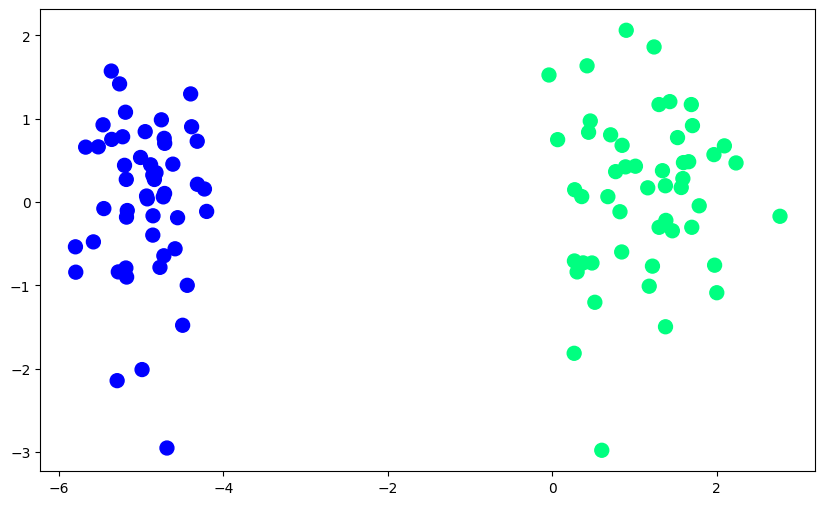

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

# Implement Perceptron trick by using step function

In [15]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [16]:
def step(z):
    return 1 if z>0 else 0

In [17]:
intercept_,coef_ = perceptron(X,y)

In [18]:
print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

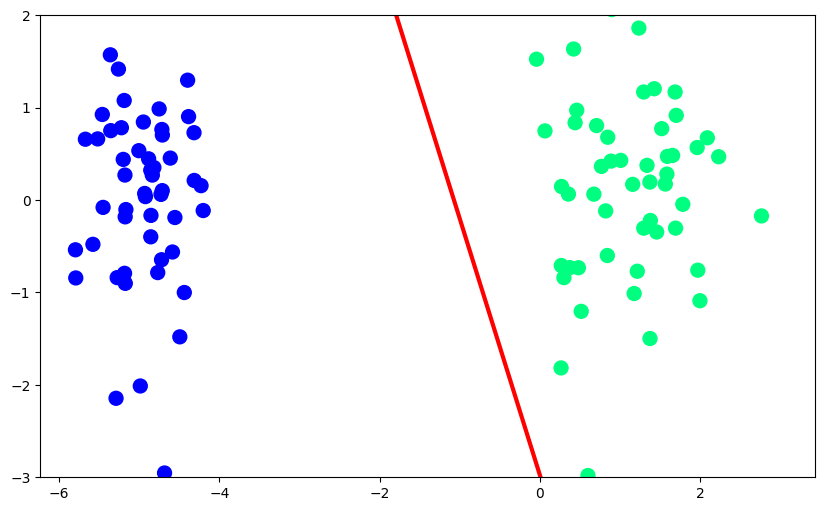

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Use sklearn's Logistic Regression to see the best solution so that we can see our line is better or not.

In [27]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [28]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [29]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

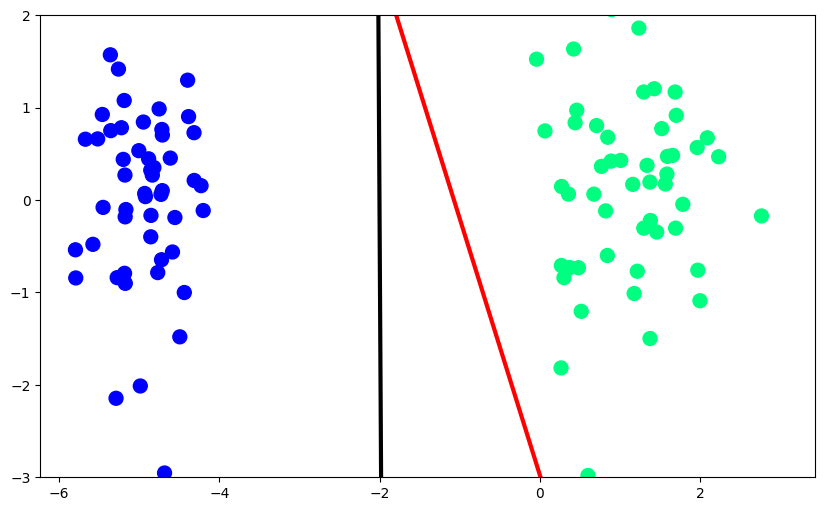

In [30]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Now use sigmoid function from scratch to see our results

In [6]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [7]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(X.shape[0])
    y_hat = sigmoid(np.dot(X[j], weights))
    weights = weights + lr * (y[j] - y_hat) * X[j]

  return weights[0], weights[1:]

In [31]:
intercept_, coef_ = perceptron(X, y)

In [32]:
print(coef_)
print(intercept_)

[1.1134548  0.33857969]
1.3000000000000003


In [33]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [34]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

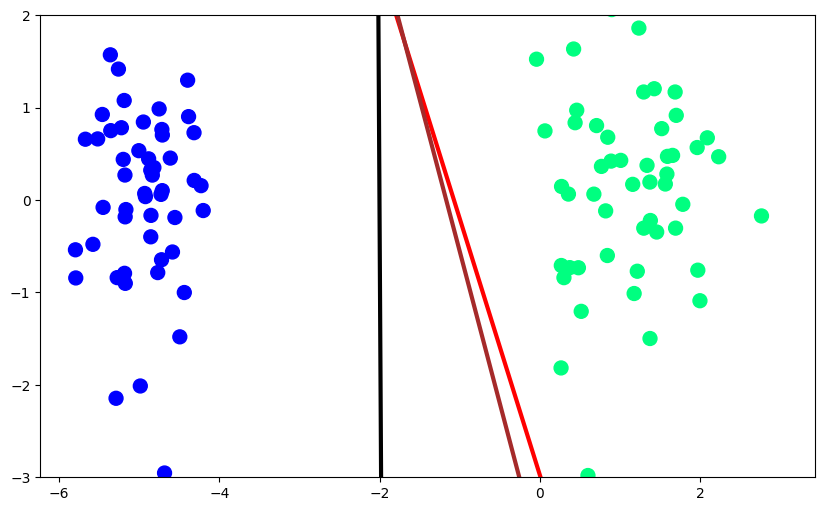

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Interpretation:
 There not much difference in step function implementation and the sigmoid's implementation. We'll figure out next that which technique is implemented in sklearn to find this best fit line